In [40]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv('idrice.csv')

# Preview dataset
data.head()


,province,production,productivity,harvest_area,year
0,Aceh,1861567100,5649,329515.78,2018
1,Sumatera Utara,2108284720,5165,408176.45,2018
2,Sumatera Barat,1483076480,4737,313050.82,2018
3,Riau,266375530,3728,71448.08,2018
4,Jambi,383045740,4444,86202.68,2018


In [41]:
# Cek missing values
data.isnull().sum()

# Pastikan kolom tahun dalam format datetime
data['year'] = pd.to_datetime(data['year'], format='%Y')

# Hapus baris kosong jika ada
data = data.dropna()

# Tampilkan info dataset
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   province      175 non-null    object        
 1   production    175 non-null    int64         
 2   productivity  175 non-null    int64         
 3   harvest_area  175 non-null    float64       
 4   year          175 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 7.0+ KB


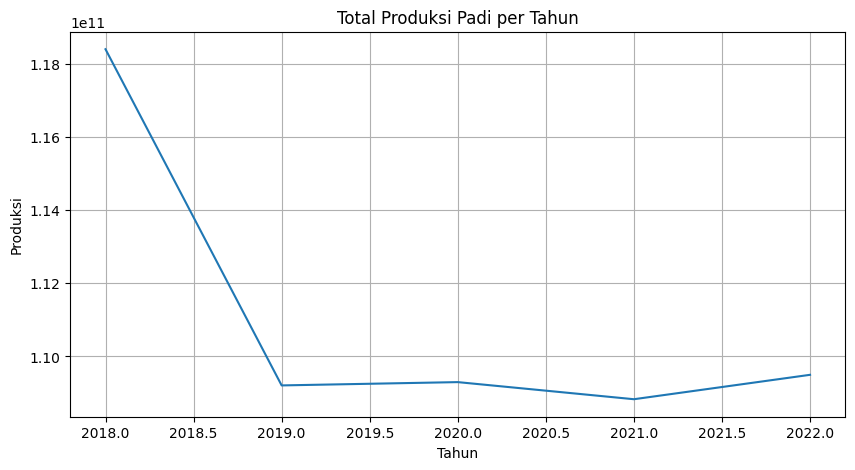

In [42]:
# Total produksi per tahun
prod_per_year = data.groupby('year')['production'].sum()

# Rata-rata produktivitas per tahun
prodv_per_year = data.groupby('year')['productivity'].mean()

plt.figure(figsize=(10,5))
plt.plot(prod_per_year.index.year, prod_per_year.values)
plt.title('Total Produksi Padi per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Produksi')
plt.grid(True)
plt.show()


In [43]:
# Produksi tahunan (asumsi sum semua provinsi)
prod_year = data.groupby(data['year'].dt.year)['production'].sum()

# Gunakan range tahun simulasi
tahun_simulasi = np.arange(2020, 2041)

# Jika dataset hanya sampai tahun tertentu, ambil rata-rata
produksi_rata2 = prod_year.mean()
produksi_rata2


np.float64(111047216240.0)

In [44]:
# Parameter asumsi konsumsi
penduduk_awal = 275_000_000   # jumlah penduduk Indonesia
pertumbuhan_penduduk = 0.8/100   # 0.8% per tahun
konsumsi_perkapita = 90        # kg beras per orang per tahun

def hitung_konsumsi(tahun_ke):
    global penduduk_awal, pertumbuhan_penduduk, konsumsi_perkapita
    penduduk = penduduk_awal * ((1 + pertumbuhan_penduduk) ** tahun_ke)
    konsumsi = penduduk * konsumsi_perkapita / 1000  # ton
    return konsumsi


In [45]:
def simulasi_sistem(produksi_awal, skenario="normal"):
    stok = []
    stok_awal = 2_000_000  # asumsi stok awal (ton)
    stok.append(stok_awal)
    
    produksi_list = []
    konsumsi_list = []
    
    for i, tahun in enumerate(tahun_simulasi):
        # Konsumsi
        konsumsi = hitung_konsumsi(i)
        
        # Produksi Skenario
        if skenario == "optimis":
            produksi = produksi_awal * 1.1
        elif skenario == "pesimis":
            produksi = produksi_awal * 0.9
        else:
            produksi = produksi_awal
        
        produksi_list.append(produksi)
        konsumsi_list.append(konsumsi)

        # Update stok
        stok_baru = stok[-1] + produksi - konsumsi
        stok.append(stok_baru)
        
    return stok, produksi_list, konsumsi_list


In [46]:
stok_normal, prod_n, kons_n = simulasi_sistem(produksi_rata2, "normal")
stok_optimis, prod_o, kons_o = simulasi_sistem(produksi_rata2, "optimis")
stok_pesimis, prod_p, kons_p = simulasi_sistem(produksi_rata2, "pesimis")


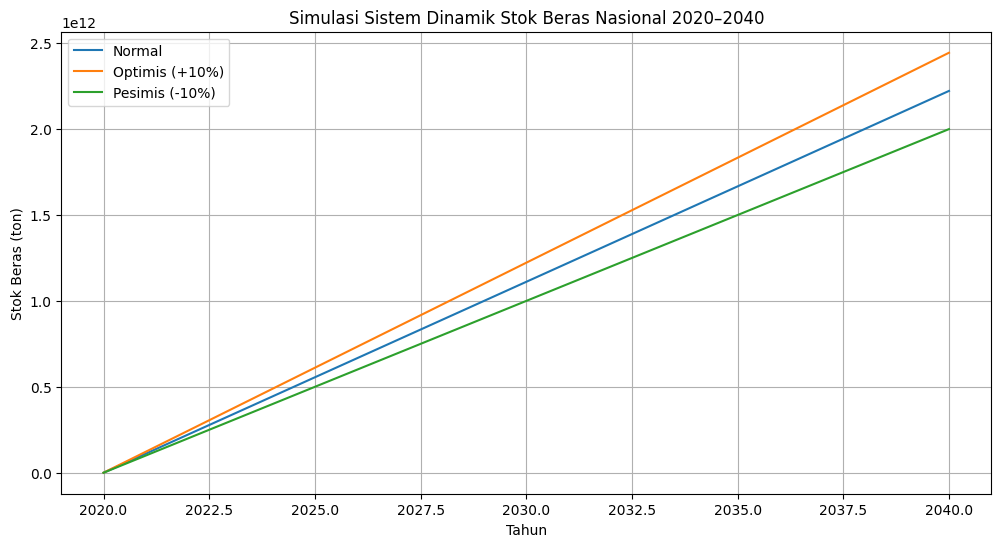

In [47]:
plt.figure(figsize=(12,6))

plt.plot(tahun_simulasi, stok_normal[:-1], label="Normal")
plt.plot(tahun_simulasi, stok_optimis[:-1], label="Optimis (+10%)")
plt.plot(tahun_simulasi, stok_pesimis[:-1], label="Pesimis (-10%)")

plt.title("Simulasi Sistem Dinamik Stok Beras Nasional 2020–2040")
plt.xlabel("Tahun")
plt.ylabel("Stok Beras (ton)")
plt.legend()
plt.grid(True)
plt.show()


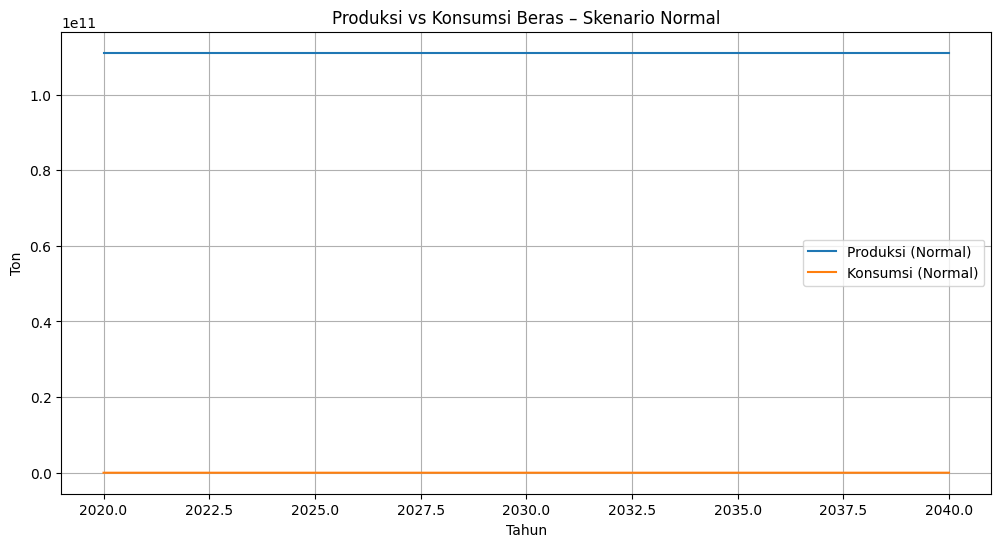

In [48]:
plt.figure(figsize=(12,6))

plt.plot(tahun_simulasi, prod_n, label="Produksi (Normal)")
plt.plot(tahun_simulasi, kons_n, label="Konsumsi (Normal)")

plt.title("Produksi vs Konsumsi Beras – Skenario Normal")
plt.xlabel("Tahun")
plt.ylabel("Ton")
plt.legend()
plt.grid(True)
plt.show()
